# 과제 목표
1. **의사결정트리(Decision Tree)**와 랜덤포레스트(Random Forest) 알고리즘의 차이를 이해한다.

2. 제공된 car_evaluation.csv 데이터셋을 활용하여 두 모델을 학습하고, 성능을 비교한다.

3. 학습 결과를 시각화하여 분석하고, 어떤 모델이 더 성능이 좋은지 탐구한다.

## 1. 데이터 준비
* 제공된 car_evaluation.csv 파일을 다운로드하여 코랩(Colab)에 업로드한 후, 필요한 전처리를 진행해주세요.(범주형 데이터를 숫자로 변환)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 드라이브 마운트 하기
%cd '/content/drive/MyDrive/GDGoC AI'

/content/drive/MyDrive/GDGoC AI


In [ ]:
## csv파일 읽기
import pandas as pd
data = pd.read_csv('car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


*  나는 이 열을 뭔 기준으로 나눈지 모르겠어 이 데이터 셋에 대해 구글링을 해보았다.
* https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set ← 이 사이트에 각 열을

1. buying: vhigh, high, med, low.


2. maint: vhigh, high, med, low.


3. doors: 2, 3, 4, 5more.


4. persons: 2, 4, more.


5. lug_boot: small, med, big.


6. safety: low, med, high.


으로 순서대로 분류 해놓은 것을 알 수 있었다.

(마지막 열은 평가 등급이라는 것을 알 수 있다.)

In [ ]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
##범주형 데이터를 숫자로 변환하기 (sklearn의 LabelEncoder를 이용)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding_columns = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
for col in encoding_columns:
  data[col] = le.fit_transform(data[col])

In [ ]:
##모든 열에 대해서 전처리 완료
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
##데이터 열 이름 알기 쉽게 바꾸기
data.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty', 'evaluation_grade']
data

,buying,maint,doors,persons,lug_boot,safty,evaluation_grade
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


## 2. 모델 학습

* 의사결정트리와 랜덤포레스트 모델을 학습한 후, 각 모델의 테스트 세트에 대한 정확도(Accuracy)를 계산해주세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 평가등급을 target(y), 나머지를 features(x)로 잡기
x_col = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty']
y_col = 'evaluation_grade'
## 데이터 나누기(train과 test를 8:2)
x_train, x_test, y_train, y_test = train_test_split(data[x_col], data[y_col], test_size=0.2, random_state=42)

In [ ]:
## 의사결정트리 모델 학습시키기
from sklearn.tree import DecisionTreeClassifier

## 의사결정트리 모델에 x와 y의 train값 학습
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)
## x의 test값을 가지고 y값 예측
DT_pred = DTmodel.predict(x_test)

## 예측한 것을 가지고 y_test와 비교하며 정확도 계산
DTaccuracy = accuracy_score(y_test, DT_pred)
print(f'DecisionTreeClassifier Accuracy: {DTaccuracy}')

DecisionTreeClassifier Accuracy: 0.9710982658959537


In [ ]:
## 랜덤포레스트 모델 학습시키기
from sklearn.ensemble import RandomForestClassifier

## 랜덤 포레스트 모델에 x와 y의 train값 학습
RFmodel = RandomForestClassifier()
RFmodel.fit(x_train, y_train)
## x의 test값을 가지고 y값 예측
RF_pred = RFmodel.predict(x_test)

## 예측한 것을 가지고 y_test와 비교하며 정확도 계산
RFaccuracy = accuracy_score(y_test, RF_pred)
print(f'RandomForestClassifier Accuracy: {RFaccuracy}')

RandomForestClassifier Accuracy: 0.9595375722543352


## 결과 시각화
1. **정확도 비교**: 두 모델의 정확도를 막대그래프로 시각화.
2. **Confusion Matrix**: 두 모델의 예측 결과를 비교하여 정확히 분류된 사례와 오분류된 사례를 분석.
3. **특성 중요도**: 랜덤포레스트에서 특성 중요도를 계산하고 시각화하여, 모델이 어떤 특성을 더 중요하게 여겼는지 확인.

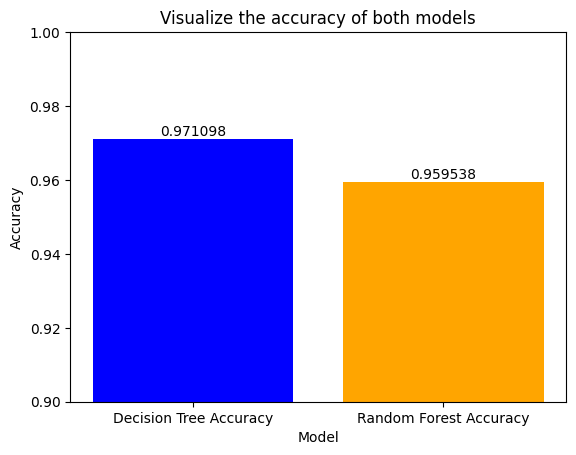

In [ ]:
## 1.두 모델의 정확도 비교 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.bar(['Decision Tree Accuracy', 'Random Forest Accuracy'], [DTaccuracy, RFaccuracy], color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.bar_label(plt.gca().containers[0])
plt.title('Visualize the accuracy of both models')

plt.show()

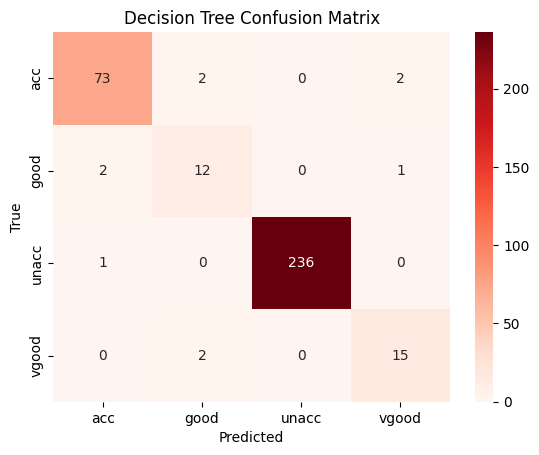

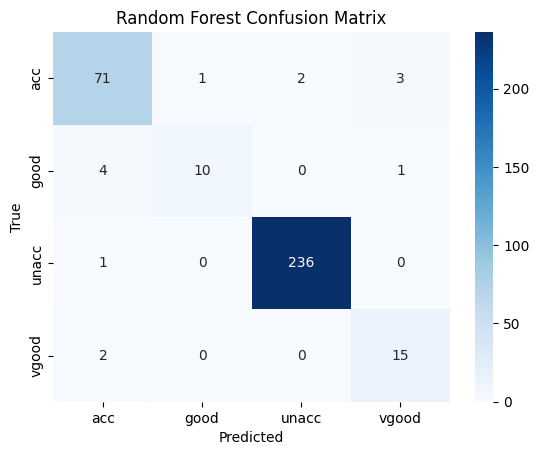

In [ ]:
## 2.두 모델의 confusion matrix 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 클래스 이름 재정의 (알파벳 순서로)
class_names = le.classes_

## DT와 RF의 혼동행렬을 각각의 예측값에 대해 만들기
DTconfusion_matrix = confusion_matrix(y_test, DT_pred)
RFconfusion_matrix = confusion_matrix(y_test, RF_pred)

## 히트맵 그리기 (클래스가 4개니 4X4의 혼동행렬(다중분류))
sns.heatmap(DTconfusion_matrix, annot=True, cmap = 'Reds', fmt = 'd',xticklabels=class_names, yticklabels=class_names)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

sns.heatmap(RFconfusion_matrix, annot=True, cmap= 'Blues', fmt = 'd',xticklabels=class_names, yticklabels=class_names)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

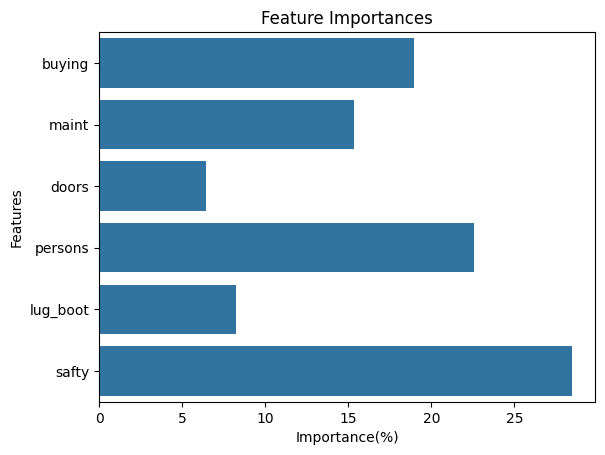

In [ ]:
## 3.특성 중요도 시각화
from sklearn.inspection import permutation_importance
## 특성 중요도를 백분율로 나타냄
feature_importances = pd.Series(RFmodel.feature_importances_*100, index=RFmodel.feature_names_in_)
plt.title("Feature Importances")
plt.xlabel("Importance(%)")
plt.ylabel("Features")
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.show()

## 두 모델의 성능 비교

In [ ]:
## 모델 분석 결과
from sklearn.metrics import classification_report

## 분류 보고서
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, DT_pred, target_names= le.classes_))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, RF_pred, target_names= le.classes_))


Decision Tree Classification Report:
              precision    recall  f1-score   support

         acc       0.96      0.95      0.95        77
        good       0.75      0.80      0.77        15
       unacc       1.00      1.00      1.00       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346


Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.91      0.92      0.92        77
        good       0.91      0.67      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.90      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



* 의사결정트리가 전체적으로 우수하게 예측을 하였다.
* 그 이유는 클래스의 불균형이 많기 때문에 여러개의 의사결정트리를 앙상블로 학습한 랜덤포레스트 기법이 더 불균형이 심해져 예측을 잘못된 방향으로 gap이 커지는 것 같다.

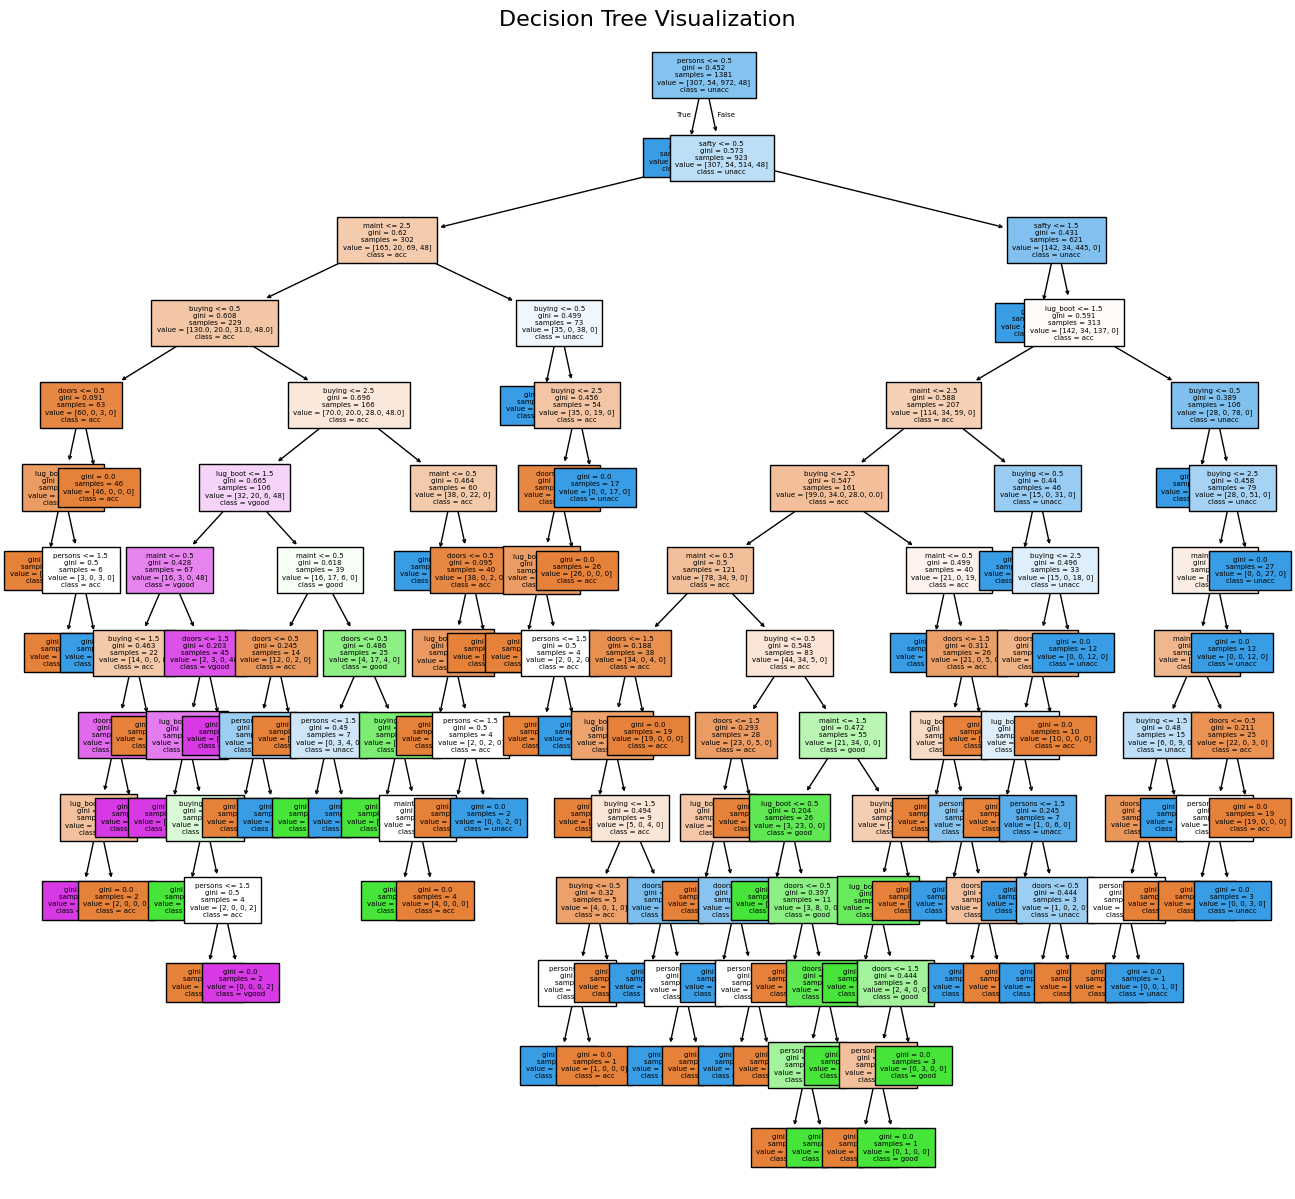

In [ ]:
## 의사결정트리의 트리 시각화
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(16, 15))
plot_tree(
    DTmodel,
    feature_names= x_col,
    class_names= le.classes_,
    filled=True,
    fontsize=5
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()